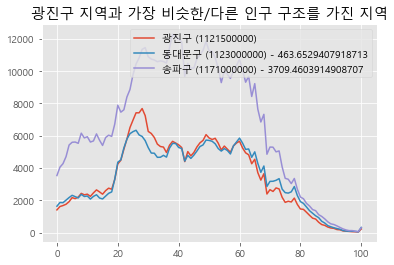

In [39]:
#문제: 인구 구조
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('seoulage.csv', 'r', encoding = 'cp949')
data = csv.reader(f)
header = next(data)
next(data)

A = []
B = []
B_title = ''
total = []

for row in data:
    if row[0].find("광진구") != -1:
        B = row
        B_title = B[0].replace('서울특별시 ','')
    else:
        A.append(row)

for i in range(3,len(B)):
    B[i] = int(B[i].replace(',',''))
        
for row in A:
    population = 0
    for i in range(3,len(B)):
        population += pow((int(row[i].replace(',',''))-int(B[i])), 2)
    total.append(population)

MIN = total.index(min(total))
MAX = total.index(max(total))

for i in range(3,len(B)):
    A[MIN][i] = int(A[MIN][i].replace(',',''))
    A[MAX][i] = int(A[MAX][i].replace(',',''))

Y_B = np.array(B[3:])
Y_MIN = np.array(A[MIN][3:])
Y_MAX = np.array(A[MAX][3:])
min_sd = np.sqrt(total[MIN]/101)
max_sd = np.sqrt(total[MAX]/101)
min_title = A[MIN][0].replace('서울특별시 ','') + " - " + str(min_sd)
max_title = A[MAX][0].replace('서울특별시 ','') + " - " + str(max_sd)
    
f.close()
plt.rc('font', family = 'Malgun Gothic')
plt.title('광진구 지역과 가장 비슷한/다른 인구 구조를 가진 지역')
plt.style.use('ggplot')
plt.plot(Y_B, label = B_title)
plt.plot(Y_MIN, label = min_title)
plt.plot(Y_MAX, label = max_title)
plt.legend()
plt.show()